# **MPA-MLF Miniproject**
# Classification of wireless transmitters
### Daniel Havránek

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.datasets import cifar10
from keras.utils import to_categorical

x_validation = pd.read_csv('drive/MyDrive/Colab Notebooks/x_test.csv')
x_in = pd.read_csv('drive/MyDrive/Colab Notebooks/x_train.csv')
y_in = pd.read_csv('drive/MyDrive/Colab Notebooks/y_train.csv')

x_train, x_test, y_train, y_test = train_test_split(x_in, y_in, test_size = 0.2)
x_train = x_train.drop("Unnamed: 0", axis=1)
x_train = x_train.drop("m_power", axis=1)
x_train = x_train.drop("Tosc", axis=1)
x_train = x_train.drop("Tmix", axis=1)
x_test = x_test.drop("Unnamed: 0", axis=1)
x_test = x_test.drop("m_power", axis=1)
x_test = x_test.drop("Tosc", axis=1)
x_test = x_test.drop("Tmix", axis=1)
y_train = y_train.drop("id", axis=1)
y_test = y_test.drop("id", axis=1)

x_val = x_validation.drop("Unnamed: 0", axis=1)
x_val = x_val.drop("m_power", axis=1)
x_val = x_val.drop("Tosc", axis=1)
x_val = x_val.drop("Tmix", axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#labels = {0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven'}
n_classes = 8

x_train_scaled = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_scaled = (x_test - x_test.min()) / (x_test.max() - x_test.min())
x_val_scaled = (x_val - x_val.min()) / (x_val.max() - x_val.min())

y_train_0 = y_train - 1
y_train_encoded = to_categorical(y_train_0.to_numpy().reshape(-1,1), num_classes=n_classes)
y_test_0 = y_test - 1
y_test_encoded = to_categorical(y_test_0.to_numpy().reshape(-1,1), num_classes=n_classes)

In [9]:
model = Sequential()
model.add(Dense(512, input_dim=8, activation='sigmoid'))
model.add(Dropout(0.01, input_shape=(8,)))
#model.add(Dense(512, input_dim=8, activation='sigmoid'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               4608      
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 8,712
Trainable params: 8,712
Non-trainable params: 0
_________________________________________________________________


In [10]:
optimizer = SGD(learning_rate = 0.2)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split = 0.2, verbose=1)

Epoch 1/20
308/308 [==============================] - 1s 4ms/step - loss: 2.3915 - accuracy: 0.1609 - val_loss: 2.6370 - val_accuracy: 0.1168
Epoch 2/20
308/308 [==============================] - 1s 3ms/step - loss: 1.8307 - accuracy: 0.2956 - val_loss: 2.4419 - val_accuracy: 0.2535
Epoch 3/20
308/308 [==============================] - 1s 3ms/step - loss: 1.4356 - accuracy: 0.4277 - val_loss: 1.4521 - val_accuracy: 0.4996
Epoch 4/20
308/308 [==============================] - 1s 3ms/step - loss: 1.1423 - accuracy: 0.5579 - val_loss: 1.1241 - val_accuracy: 0.4650
Epoch 5/20
308/308 [==============================] - 1s 3ms/step - loss: 0.8764 - accuracy: 0.6879 - val_loss: 1.0806 - val_accuracy: 0.7400
Epoch 6/20
308/308 [==============================] - 1s 3ms/step - loss: 0.7071 - accuracy: 0.7808 - val_loss: 0.9807 - val_accuracy: 0.5297
Epoch 7/20
308/308 [==============================] - 1s 3ms/step - loss: 0.5803 - accuracy: 0.8407 - val_loss: 0.8351 - val_accuracy: 0.6998
Epoch 

In [11]:
score = model.evaluate(x_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.45102211833000183
Test accuracy: 85.77473759651184 %


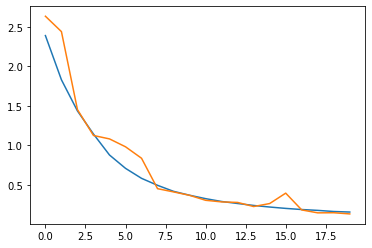

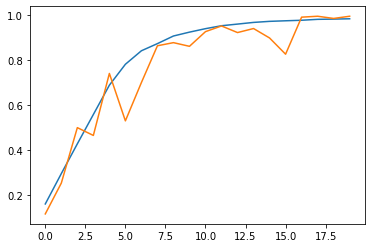

In [12]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

120/120 [==============================] - 0s 1ms/step


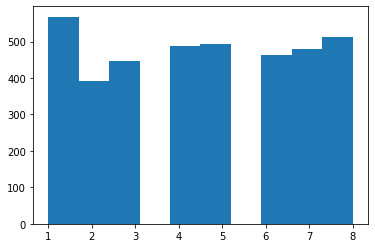

In [13]:
prediction = model.predict(x_val_scaled)

ind = np.argmax(prediction, axis=1)
res = ind + 1
result = pd.DataFrame({'id': np.arange(0, len(res)), 'target': res})
result = result.drop("id", axis=1)
result.index.name = 'id'

plt.figure()
plt.hist(result)
plt.show()

In [8]:
from google.colab import files
result.to_csv('result.csv') 
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>